# Module 6. Labs regression analysis

## Exercise 1: Relation between heart weight and body weight in Cats

### Part 1

Perform a linear regression analysis on the variables body weight (`Bwt`, dependent variable) and heart weight (`Hwt`, independent variabele).


1. Import the dataset `Cats.csv`.


In [3]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression
import os

In [4]:
cats = pd.read_csv(os.path.join('..','data','Cats.csv'))
# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables.


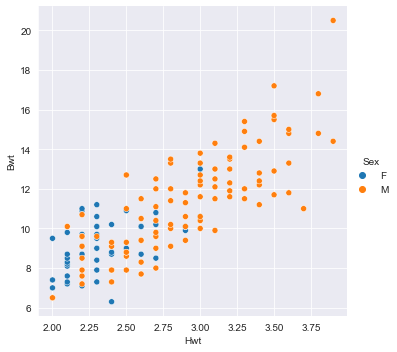

In [5]:
sns.relplot(data=cats,  x='Hwt', y='Bwt', hue='Sex')

3. Calculate and draw the regression line.


In [6]:
from sklearn.linear_model import LinearRegression

# convert X-values to 2D array
x = cats.Hwt.values.reshape(-1,1)
y = cats.Bwt

weight_model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

Regression line: ŷ = -0.35 + 4.03 x


<AxesSubplot:xlabel='Hwt', ylabel='Bwt'>

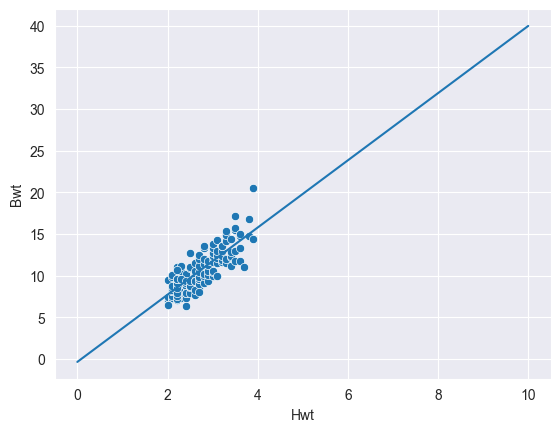

In [8]:
import math
# set the minimum and maximum value of the x- and y-axis
xmin = math.floor(cats['Hwt'].min() / 10) * 10
xmax = math.ceil(cats['Hwt'].max() / 10) * 10

ymin = math.floor(cats['Bwt'].min() / 10) * 10
ymax = math.ceil(cats['Bwt'].max() / 10) * 10
x_values = [xmin, xmax]
y_values = [weight_model.coef_[0] * x_values[0] + weight_model.intercept_, weight_model.coef_[0] * x_values[1] + weight_model.intercept_]

sns.lineplot(x=x_values, y=y_values)
sns.scatterplot(x=cats.Hwt, y=cats.Bwt)

4. Calculate the correlation coefficient and the coefficient of determination.

In [10]:
cor = np.corrcoef(cats.Hwt, cats.Bwt)[0][1]
print(f"R = {cor}")
print(f"R² = {cor**2}")

R = 0.804134787315513
R² = 0.6466327561709654


5. Interpret the results from the previous steps.
_increasing and strong linear relation between Hwt and Bwt_.

### Part 2

1. Perform a linear regression analysis on the variables body weight (`Bwt`) and heart weight (`Hwt`), but this time **subdivided by gender** (`Sex`). Use the same dataset (`Cats.csv`).


2. Draw a scatter plot of both variables for each gender.


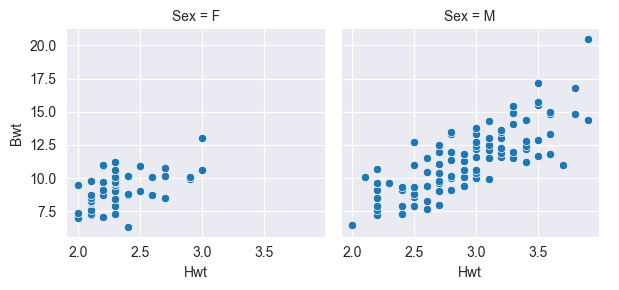

In [12]:
# advanced densityplot using 3 variables
facetGrid = sns.FacetGrid(data=cats, col='Sex')
facetGrid.map(sns.scatterplot, 'Hwt','Bwt')
facetGrid.add_legend()

3. Calculate and draw the regression line.


Regression line: ŷ = -1.1768252533094827 + 4.309818875119161 x


4. Calculate the correlation coefficient and the coefficient of determination.


5. Interpret the results from the previous steps.

### Answers

| Selection |  $\beta_0$ | $\beta_1$ |       $R$ |     $R^2$ |
| :-------- | ---------: | --------: | --------: | --------: |
| All       | -0.3510784 | 4.0317575 | 0.8041348 | 0.6466328 |
| Male      | -1.1768253 | 4.3098189 | 0.7930443 | 0.6289193 |
| Female    |  2.9813124 |  2.636414 | 0.5320497 | 0.2830768 |


## Exercise 2: Vlaamse land en tuinbouwbedrijven

1. Use the dataset Landbouw Vlaanderen. The file contains data about farms in Vlaanderen

Source: Departement Landbouw en Visserij op basis StatBel

In [21]:
landbouw = pd.read_csv(os.path.join('..','data','Landbouw Vlaanderen.csv'), delimiter = ";")
# Show the first few records of the Data Frame
landbouw.head()

,jaar,aantal land en tuinbouwbedrijven,gemiddelde oppervlakte per bedrijf (ha)
0,1980,75706,"8,38"
1,1981,73292,"8,58"
2,1982,71255,"8,79"
3,1983,69807,"8,94"
4,1984,68083,"9,15"


2. What are the datatypes for each of the columns.

In [22]:
landbouw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   jaar                                     41 non-null     int64 
 1   aantal land en tuinbouwbedrijven         41 non-null     int64 
 2   gemiddelde oppervlakte per bedrijf (ha)  41 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [15]:
landbouw.dtypes

jaar                                        int64
aantal land en tuinbouwbedrijven            int64
gemiddelde oppervlakte per bedrijf (ha)    object
dtype: object

3. Change the datatype of 'gemiddelde oppervlakte per bedrijf (ha)' to float.

In [23]:
landbouw['gemiddelde oppervlakte per bedrijf (ha)'] = landbouw['gemiddelde oppervlakte per bedrijf (ha)'].str.replace(',','.')
landbouw['gemiddelde oppervlakte per bedrijf (ha)'] = pd.to_numeric(landbouw['gemiddelde oppervlakte per bedrijf (ha)'],errors='coerce')
landbouw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   jaar                                     41 non-null     int64  
 1   aantal land en tuinbouwbedrijven         41 non-null     int64  
 2   gemiddelde oppervlakte per bedrijf (ha)  41 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


In [25]:
landbouw = landbouw.rename(columns={'aantal land en tuinbouwbedrijven': 'aantal'})
landbouw = landbouw.rename(columns={'gemiddelde oppervlakte per bedrijf (ha)': 'oppervlakte'})

4. Draw a scatter plot of the number of farms versus the year.


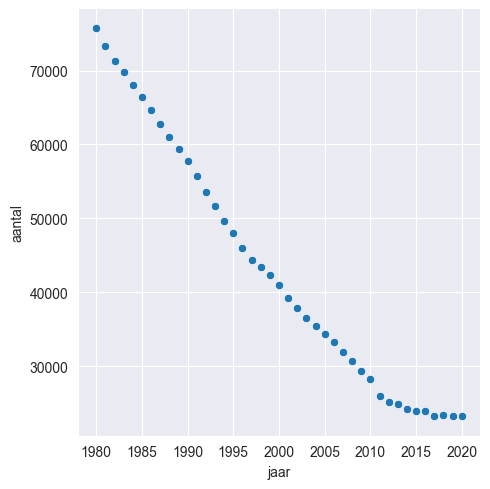

In [26]:
sns.relplot(data=landbouw, x='jaar', y='aantal')

5. Is there a positive / negative relationship between jaar and 'aantal land en tuinbouwbedrijven'?

R = -0.9861066349492859

In [27]:
cor = np.corrcoef(landbouw.jaar, landbouw.aantal)[0][1]
print(f"R = {cor}")

R = -0.9861066349492859


6. Is there a strong relationship between jaar and 'aantal land en tuinbouwbedrijven'?

R² = 0.9724062954910041

In [28]:
print(f"R² = {cor**2}")

R² = 0.9724062954910041


7. Draw a scatter plot of the 'gemiddelde oppervlakte per bedrijf (ha)' versus the year.

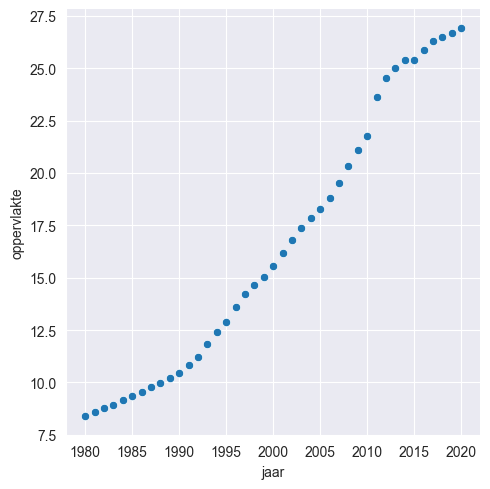

In [29]:
sns.relplot(data=landbouw, x='jaar', y='oppervlakte')

8. What will be the 'gemiddelde oppervlakte per bedrijf (ha)' in 2035?

Gemiddelde oppervlakte in 2035 = 34.91987804878045

In [30]:
from sklearn.linear_model import LinearRegression

# convert X-values to 2D array
x = landbouw.jaar.values.reshape(-1,1)
y = landbouw.oppervlakte

weight_model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")
print(f"gem opp in 2035 = {2035 * weight_model.coef_[0] + weight_model.intercept_}")

Regression line: ŷ = -1031.90 + 0.52 x
gem opp in 2035 = 34.91987804878045


8. Calculate the total agricultural area for each year.   
Calculate for each year the change of the total area relative to 1980.  
Make a plot.

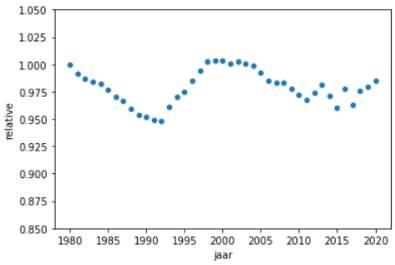


In [33]:
landbouw['totaal'] = landbouw['aantal'] * landbouw['oppervlakte']
landbouw['verschil'] = landbouw['totaal'] - landbouw['totaal'].where(landbouw['jaar']==1980)

,jaar,aantal,oppervlakte,totaal
0,1980,75706,8.38,634416.28
1,1981,73292,8.58,628845.36
2,1982,71255,8.79,626331.45
3,1983,69807,8.94,624074.58
4,1984,68083,9.15,622959.45


In [39]:
tachtig = landbouw.loc[landbouw['jaar']==1980, 'totaal']
tachtig

0    634416.28
Name: totaal, dtype: float64

In [40]:
tachtig = landbouw.iloc[0,3]
tachtig

634416.28

In [42]:
landbouw['relatief'] = landbouw['totaal'] / tachtig
landbouw.head()

,jaar,aantal,oppervlakte,totaal,relatief
0,1980,75706,8.38,634416.28,1.000000
1,1981,73292,8.58,628845.36,0.991219
2,1982,71255,8.79,626331.45,0.987256
3,1983,69807,8.94,624074.58,0.983699
4,1984,68083,9.15,622959.45,0.981941


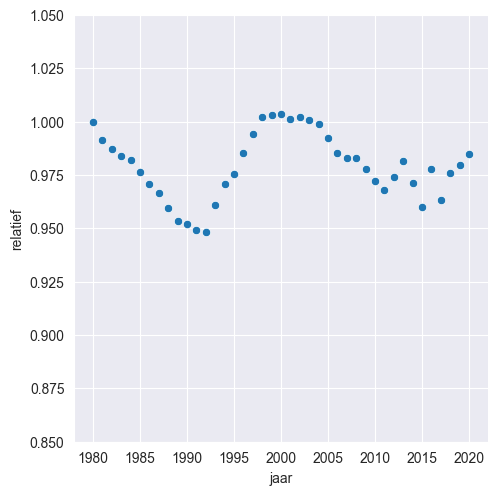

In [45]:
graph = sns.relplot(data=landbouw, x='jaar', y='relatief')
graph.set(ylim = (0.85,1.05))

## Exercise 3: Movies of 2006 and 2007

1. The file Movies_2006_2007 contains information on over 200
movies that were released during 2006 and 2007.

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Movies_2006_2007.csv', delimiter = ";", encoding='cp1252')
# Show the first few records of the Data Frame
movies.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,$22 707 121,$32 109 139,$39 517 763,$11 000 000,$15 909 367,$16 000 000
1,2.0,Year of the Dog,Paramount Vantage,Drama,$141 803,$318 598,$1 540 141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,$12 839 402,NaN,$22 466 994,$18 200 000,$27 040 983,$25 000 000
3,4.0,Stomp the Yard,Sony Pictures,Drama,$28 263 594,$42 853 277,$61 356 221,$15 000 000,$33 166 898,$14 000 000
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,$39 868 642,$44 407 533,$38 189 217,$16 500 000


2. Use cols_with_dollars to transform the amounts in dollars into floats.
For ease of use, change the values into 'million dollar' - values.  
E.g. $22 707 121	becomes 22.707121.  


In [ ]:
cols_with_dollars = ['7-day Gross',	'14-day Gross',	'Total US Gross',	'International Gross',	'US DVD Sales',	'Budget']

3. Create two scatterplots: one of Total US Gross (Y) versus
7-day Gross (X) and one of Total US Gross (Y)
versus 14-day Gross (X).

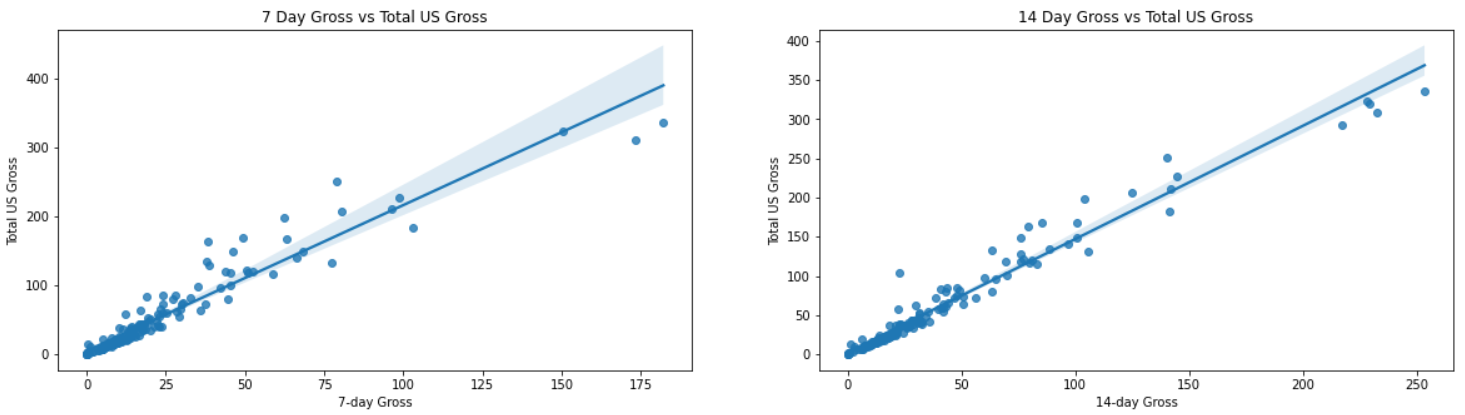

4. What are the corresponding
values for $R$ and $R^2$?

R (7 Day Gross vs Total US Gross) = 0.959407544414305  
R² (7 Day Gross vs Total US Gross) = 0.9204628362790865  
R (14 Day Gross vs Total US Gross) = 0.9813238689021966  
R² (14) Day Gross vs Total US Gross) = 0.9629965356771755

5. What are the equations of the linear regression lines in the previous part?  
What exactly does intercept and slope tell you about the movie business?

7 days gross: ŷ = 4.590921233818129 + 2.113464756610182 * x  
14 days gross: ŷ = 2.44900289255105 + 1.4464530702590803 * x

6. In the previous scatterplots you can see some ouliers at the right side. These are movies that did great
during their first week or two. 
* 6.1 Make a boxplot to visualize the outliers for the first week or two.

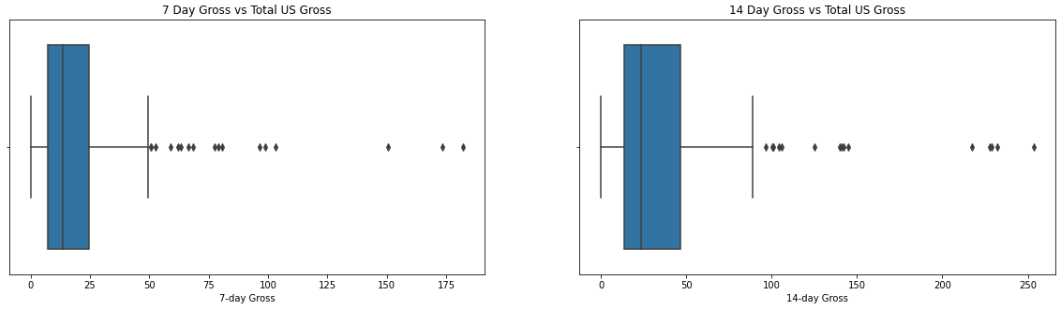

* 6.2 Calculate the upper limit values for the first week or two.

limit_7_days_gross is 50.376637875  
limit_14_days_gross is 96.2906745

* 6.3 What are the outliers for the first week or two?

A few movies for the first week: 

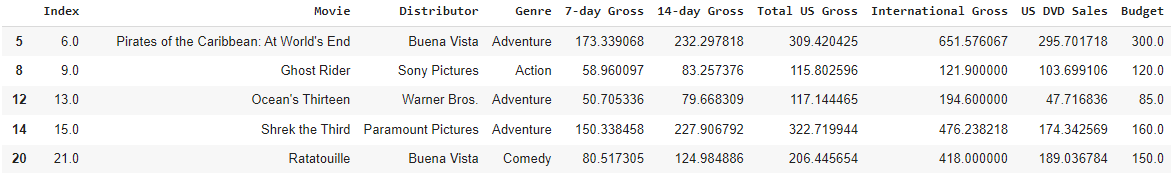

* 6.4 Remove the outliers out of the dataset.

* 6.5 Give the new values for $R$ and $R^2$.


R (7 Day Gross vs Total US Gross)= 0.9324792650689281  
R² (7 Day Gross vs Total US Gross) = 0.8695175797834882

R (14 Day Gross vs Total US Gross)= 0.9584258717658031  
R² (14) Day Gross vs Total US Gross) = 0.9185801516700396

* 6.6 Give the new values for the slope and the intercept of the regression lines. Do the outliers have a great effect?


7 days gross: ŷ = -5.073945979380596 + 2.7456809688135646 * x  
14 days gross: ŷ = -3.227354951096885 + 1.6529869503645318 * x